In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
prosper_df = pd.read_csv('prosperLoanData.csv')

In [3]:
print(prosper_df.shape)
print(prosper_df.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRa

### important variables planned to be used in exploratory analysis

- CreditGrade (for only pre 2009 period. Assigned credit grade before listing went live)
- Term (length of loan)
- LoanStatus (imp: Defaulted, chargedoff, PastDue, Current)
- Borrower Rate (since there are some missing values for APR, we proceed to analyze borrower rate)
- ListingCreationDate: Date of listing creation (used for filtering listings,(pre and post july, 2009)

#### Post 2009 period
- EstimatedReturn: estimated return for each loan. (estimated yield minus estimated loss)
- prosperRating (alpha and numeric) Rating given by prosper for each loan. Range from 1 to 7, 0 being for N/A cases. alpha ranges through HR, E, D, C, B, A, AA
- ProsperScore: Risk score ranging from 1 to 10. 10 being best or lowest risk score

#### All period
- ListingCategory: Category selected by borrower for type of loan: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- BorrowerState: state of the borrower
- Occupation: Selected by borrower at the time of listing.
- EmploymentStatus: Selected by borrower at the time of listing.
- EmploymentStatusDuration: Duration of said employment
- IsBorrowerHomeowner: If borrower has a mortgage on a home has provided documents for possessing a home.


## Assess

In [4]:
prosper_df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

#### Quality issues
- CreditGrade is not categorical ordinal with order. [AA,A, B, C, D, E, HR, NC]
- ListingCreationDate is not in date format

## Clean
### Format of listingCreationDate
#### Define
- check what date format the values are in
- Convert into date format

#### Code

In [5]:
prosper_df.ListingCreationDate.sample(5)

35285    2007-10-28 23:35:00.893000000
7975     2012-10-08 05:58:45.670000000
20693    2012-04-16 07:08:54.690000000
71164    2007-06-13 15:01:08.730000000
23884    2013-12-17 07:26:45.467000000
Name: ListingCreationDate, dtype: object

In [6]:
prosper_clean_df = prosper_df.copy()
prosper_clean_df.ListingCreationDate = pd.to_datetime(prosper_df.ListingCreationDate)

### Test

In [7]:
prosper_clean_df.iloc[:,:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 5 columns):
ListingKey             113937 non-null object
ListingNumber          113937 non-null int64
ListingCreationDate    113937 non-null datetime64[ns]
CreditGrade            28953 non-null object
Term                   113937 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.3+ MB


# Univariate Analysis
#### CreditGrade

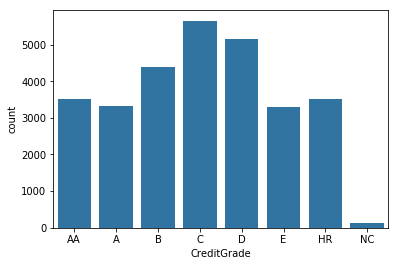

In [8]:
cat_order = ['AA','A','B','C','D','E','HR','NC']
base_color = sb.color_palette()[0]
sb.countplot(data = prosper_df, x = 'CreditGrade',color = base_color,order = cat_order)

There is a fairly normal distribution in the above. we must remember one thing though, that the data is only for pre 2009 loans.
#### Term

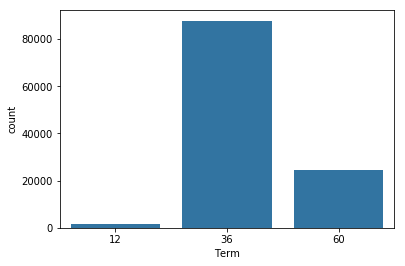

In [9]:
#cat_order = ['AA','A','B','C','D','E','HR','NC']
base_color = sb.color_palette()[0]
sb.countplot(data = prosper_df, x = 'Term',color = base_color)#,order = cat_order)

The most frequent type of loan is the 36 month (3 year) loan. Followed by the 5 year loan and the 1 year loan.
#### LoanStatus

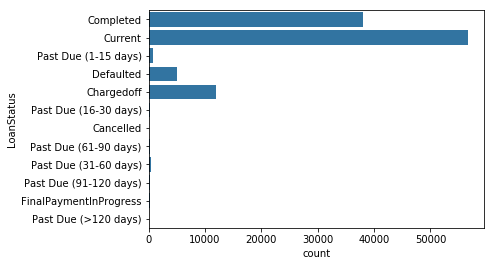

In [10]:
#cat_order = ['AA','A','B','C','D','E','HR','NC']
base_color = sb.color_palette()[0]
sb.countplot(data = prosper_df, y= 'LoanStatus',color = base_color)#,order = cat_order)
#lt.xticks(rotation=45)

Clearly 'Current' and 'Completed' loans make up most of the loans in the dataset. Defaulted and chargedoff are the next most frequent category.

Could maybe further see how the other variables behave when subsetted by Completed, Defaulted and Chargedoff. What are the differences between loan details of completed and defaulted loans.
#### BorrowerRate

C:\Users\Ashok Anand\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64


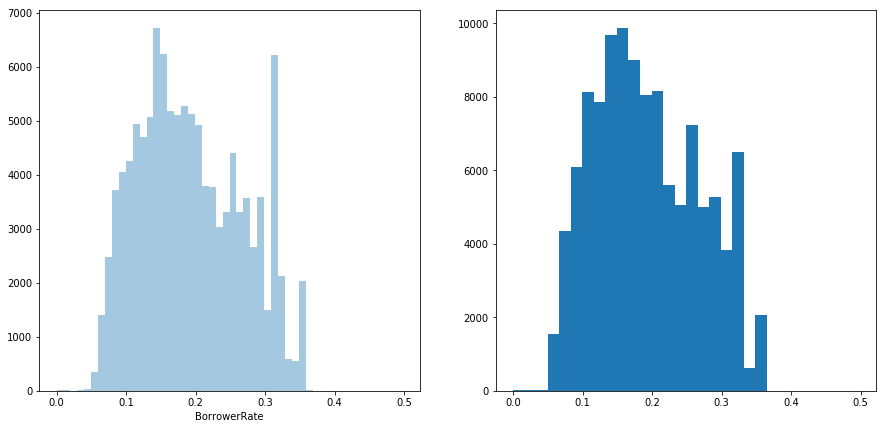

In [11]:
#cat_order = ['AA','A','B','C','D','E','HR','NC']
fig, (ax0,ax1) = plt.subplots(1,2, figsize = (15,7))
base_color = sb.color_palette()[0]
p = sb.distplot(  prosper_df.BorrowerRate,color = base_color,ax=ax0, kde=False)
p = ax1.hist(  prosper_df.BorrowerRate,color = base_color, bins = 30)
#lt.xticks(rotation=45)
print(prosper_df.BorrowerRate.describe())

Borrower rate follows a fairly normal distribution with some skew towards the right. It has its median at 0.184 or 18.4%.
<br> p.s. Used two plots, one with seaborn and other with matplotlib to compare differences in plotting.
#### EstimatedReturn

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64
Mode:  0    0.1246
dtype: float64


C:\Users\Ashok Anand\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


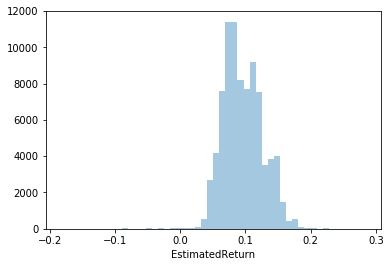

In [12]:
sb.distplot(prosper_df.EstimatedReturn.dropna(),kde = False)
print(prosper_df.EstimatedReturn.dropna().describe())
print('Mode: ',prosper_df.EstimatedReturn.dropna().mode())

The plot above shows that estimated return is centered around 0.8, and it is skewed to the right.
<br>Estimated Return is only for the post 2009 period, and it has both postive and negetaive values. 
<br>Looking at the **mode**, we see that the most frequent estimated return is **0.1246**. However, the describe function says the **mean is 0.096** and the **median is 0.0917**. This shows that there is a **long tail** of small and negative values in the distribution which pulled the median and the mean to the left.
<br>**EstimatedReturn** shows how much return as a 'percentage of the loan amount' is to be expected from each loan listing approximately
#### Proper Rating

(array([ 6935.,     0.,     0.,  9795.,     0.,     0., 14274.,     0.,
            0.,     0., 18345.,     0.,     0., 15581.,     0.,     0.,
        14551.,     0.,     0.,  5372.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. , 4.3, 4.6,
        4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <a list of 20 Patch objects>)

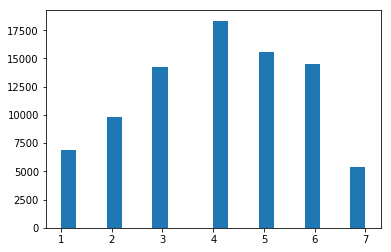

In [13]:
plt.hist(x =prosper_df['ProsperRating (numeric)'].dropna(), bins = 20)

The rating appears to be normally distributed albeit for descrete values. the most frequently assigned rating being 4.
<br>The rating ranges from 1 (lowest) to 7 (highest)

In [14]:
c = prosper_clean_df[prosper_clean_df.ListingCreationDate>'01-01-2009']
c['ProsperRating (numeric)'].isna().sum()

28

In [43]:
c = prosper_clean_df[prosper_clean_df.ListingCreationDate>'01-01-2009']
c['ProsperRating (Alpha)'].isna().sum()

28

We can see that there are 28 Loan listings that have missing values for prosper rating. 
<br>We see that the same is true for the prosperrating alpha.

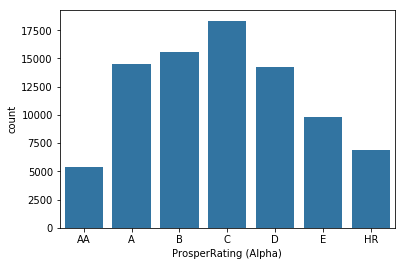

In [32]:
cat_order = ['AA','A','B','C','D','E','HR']
sb.countplot(prosper_clean_df['ProsperRating (Alpha)'],order = cat_order,color = base_color)

We can see that the rating is following a fairly normal distribution with C most frequently given to loans and AA being the least frequent.
<br>ProsperRating is given to every loan at the time of listing. It is shows the creditworthiness of a borrower
#### ProsperScore

(array([  992.,     0.,  5766.,     0.,  7642.,     0., 12595.,     0.,
         9813.,     0., 12278.,     0., 10597.,     0., 12053.,     0.,
         6911.,     0.,  4750.,  1456.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <a list of 20 Patch objects>)

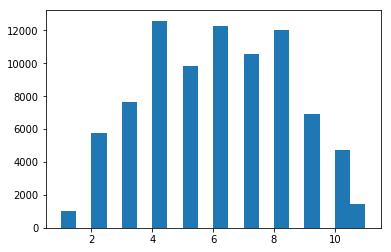

In [35]:
plt.hist(x =prosper_df['ProsperScore'].dropna(), bins = 20)

The Prosper score is given by an inhouse credit risk model by prosper. It looks like it is normally distributed with a little left skew.
#### ListingCategory

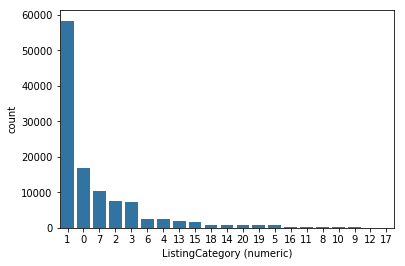

In [55]:
c = prosper_clean_df['ListingCategory (numeric)'].value_counts()
sb.countplot(prosper_clean_df['ListingCategory (numeric)'],order = c.index,color = base_color)

From the above plot we can see that the most common purpose of loan is (1)'Debt Consolidation' closely followed by (0)'Reason not available'.
<br>The **top 5** listing categories are **1.'Debt consolidation', 2.'Not Available', 3.'Other', 4.'Home Improvement', 5. 'Business'**

### Variables left
- BorrowerState: state of the borrower
- Occupation: Selected by borrower at the time of listing.
- EmploymentStatus: Selected by borrower at the time of listing.
- EmploymentStatusDuration: Duration of said employment
- IsBorrowerHomeowner: If borrower has a mortgage on a home has provided documents for possessing a home.

#### BorrowerState

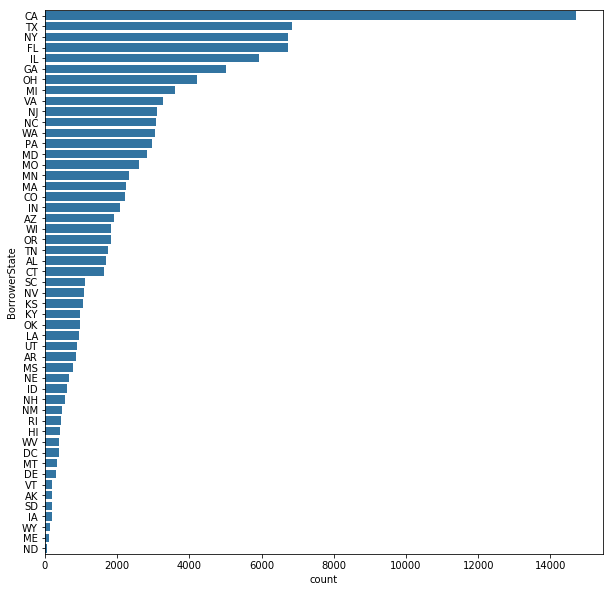

In [58]:
c = prosper_clean_df['BorrowerState'].value_counts()
fig, ax = plt.subplots(figsize=(10,10))
sb.countplot(y =prosper_clean_df['BorrowerState'],order = c.index,color = base_color)

Looks like the states of CA, TX and NY have the most loan listings in prosper.

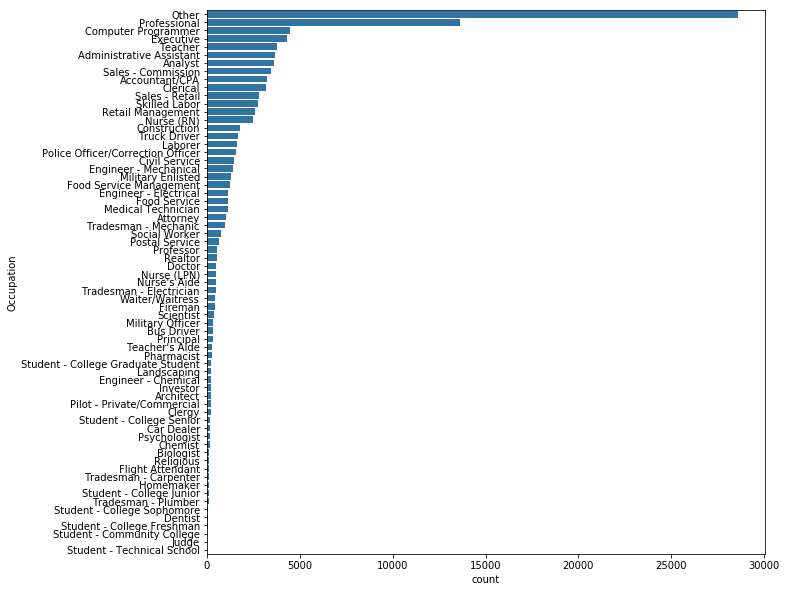

In [59]:
c = prosper_clean_df['Occupation'].value_counts()
fig, ax = plt.subplots(figsize=(10,10))
sb.countplot(y =prosper_clean_df['Occupation'],order = c.index,color = base_color)

The above plot is quite interesting in that it lists the range of occupations chosen by borrowers. The top occupations are:
1. Other
2. Professional
3. Executive
4. Teacher
5. Administrative Assistant

Possible directions with this variable would be to see how does the rate of default depend upon the occupation chosen. This can be done for the top 10 occupations (removing the 'other' category)
#### EmploymentStatus

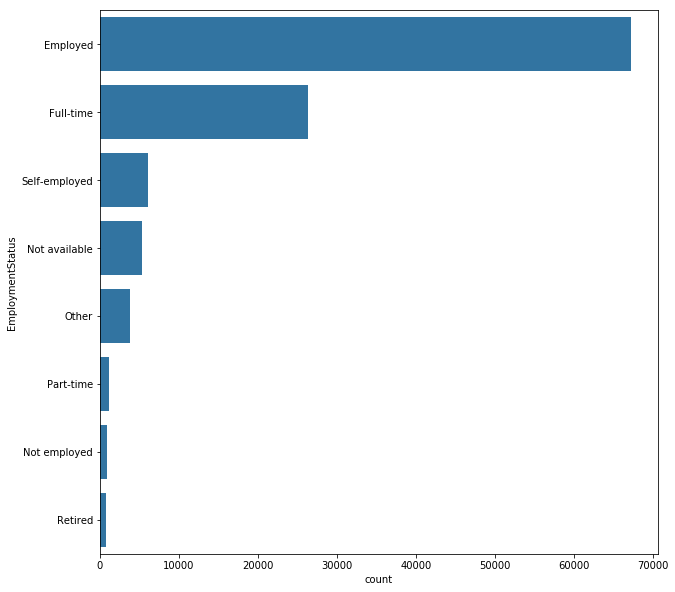

In [60]:
c = prosper_clean_df['EmploymentStatus'].value_counts()
fig, ax = plt.subplots(figsize=(10,10))
sb.countplot(y =prosper_clean_df['EmploymentStatus'],order = c.index,color = base_color)

Here we see that Employed persons list for loans more than any other category. It would be interesting to see how this variable varies with whether the loan is defaulted or completed.
#### EmploymentStatusDuration

C:\Users\Ashok Anand\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


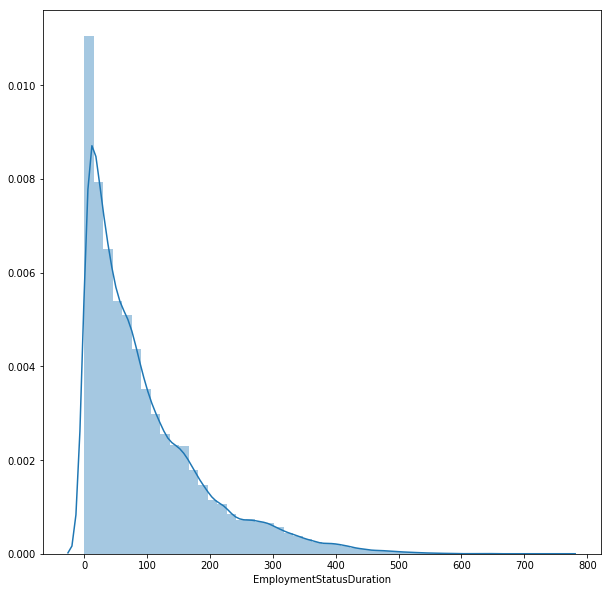

In [63]:
c = prosper_clean_df['EmploymentStatusDuration'].value_counts()
fig, ax = plt.subplots(figsize=(10,10))
sb.distplot(prosper_clean_df['EmploymentStatusDuration'].dropna())#,order = c.index,color = base_color)

There is a very long tail to the right of the plot above. We can see that it is unimodal with the mode close to 0. Here I drop all missing values and plot only values where there is data existing.

One direction would be to relate this with type of occupation, and employment status.
<br>My hunch is that this may inversely relate to the probability of default. Common sense tells me that if someone has worked for a long time, the person must be experienced in the use of credit and the importance of credit score, hence less prone to default.
#### IsBorrowerHomeowner

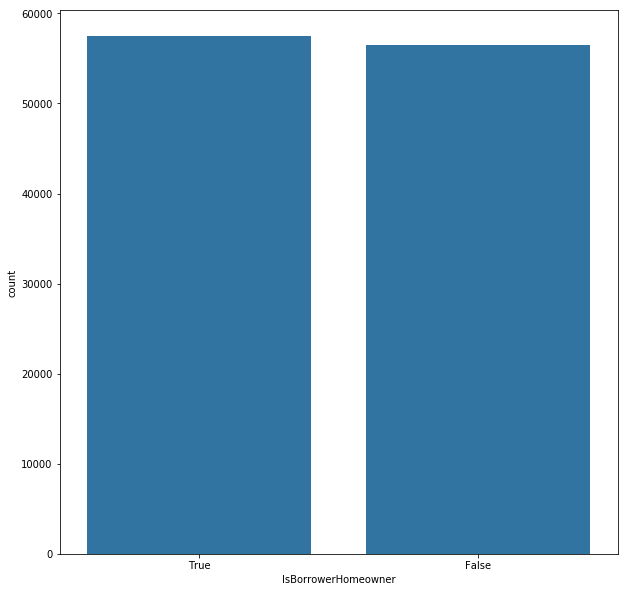

In [73]:
c = prosper_clean_df['IsBorrowerHomeowner'].value_counts()
fig, ax = plt.subplots(figsize=(10,10))
sb.countplot(x =prosper_clean_df['IsBorrowerHomeowner'],order = c.index,color = base_color)

In [74]:
c/sum(c)*100   #Percentage of total

True     50.447177
False    49.552823
Name: IsBorrowerHomeowner, dtype: float64

Here we see that the data has equal representation from homeowners and those that are not.

Looking at the impact of having a home vs not having a home on the status of loan would be one directiion of further exploration.
# Bivariate Analysis

# References
- APR explanation: https://www.investopedia.com/terms/a/apr.asp
- Default vs Charge-Off: https://help.lendingclub.com/hc/en-us/articles/216127747-What-is-the-difference-between-a-loan-that-is-in-default-and-a-loan-that-has-been-charged-off-
- Credit rating https://www.investopedia.com/terms/c/creditrating.asp

